# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [17]:
#df.isna().sum().sort_values(ascending=False).head(10)
#df = df.dropna(subset=["enroll"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [4]:
# @@@ 1
# Your Code
len(df["YEAR"].unique())

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [7]:
# @@@ 2
michigan = df[df["STATE"] == "MICHIGAN"]["AVG_READING_8_SCORE"].mean()
ohio = df[df["STATE"] == "OHIO"]["AVG_READING_8_SCORE"].mean()

print("Michigan average:", michigan)
print("Ohio average:", ohio)

if michigan > ohio:
    print("Michigan has the higher average.")
elif ohio > michigan:
    print("Ohio has the higher average.")
else:
    print("They are the same.")

Michigan average: 263.5
Ohio average: 267.7
Ohio has the higher average.


Find the average for your chosen test across all states in 2019

In [8]:
# @@@ 3
df[df["YEAR"] == 2019]["AVG_READING_8_SCORE"].mean()

np.float64(262.5660377358491)

For each state, find a maximum value for your chosen test score

In [9]:
# @@@ 4
df.groupby("STATE")["AVG_READING_8_SCORE"].max()

STATE
ALABAMA                 259.0
ALASKA                  261.0
ARIZONA                 263.0
ARKANSAS                262.0
CALIFORNIA              263.0
COLORADO                271.0
CONNECTICUT             275.0
DELAWARE                267.0
DISTRICT_OF_COLUMBIA    250.0
DODEA                   280.0
FLORIDA                 267.0
GEORGIA                 266.0
HAWAII                  261.0
IDAHO                   270.0
ILLINOIS                267.0
INDIANA                 272.0
IOWA                    269.0
KANSAS                  269.0
KENTUCKY                270.0
LOUISIANA               257.0
MAINE                   271.0
MARYLAND                274.0
MASSACHUSETTS           278.0
MICHIGAN                266.0
MINNESOTA               271.0
MISSISSIPPI             256.0
MISSOURI                268.0
MONTANA                 273.0
NATIONAL                268.0
NEBRASKA                270.0
NEVADA                  262.0
NEW_HAMPSHIRE           275.0
NEW_JERSEY              276.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [10]:
# @@@ 5
df["expenditure_per_student"] = df["TOTAL_EXPENDITURE"] / df["ENROLL"]

df[["STATE", "YEAR", "TOTAL_EXPENDITURE", "ENROLL", "expenditure_per_student"]].head()

,STATE,YEAR,TOTAL_EXPENDITURE,ENROLL,expenditure_per_student
0,ALABAMA,1992,2653798.0,NaN,NaN
1,ALASKA,1992,972488.0,NaN,NaN
2,ARIZONA,1992,3401580.0,NaN,NaN
3,ARKANSAS,1992,1743022.0,NaN,NaN
4,CALIFORNIA,1992,27138832.0,NaN,NaN


Feature engineering justification: **I created expenditure_per_student because total spending alone isn’t comparable across states with very different enrollment sizes. Dividing TOTAL_EXPENDITURE by ENROLL standardizes funding on a per-student basis, making it a fairer feature to compare states and a more meaningful predictor of academic performance (since resources available per student are what should relate to outcomes, not total dollars spent).**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

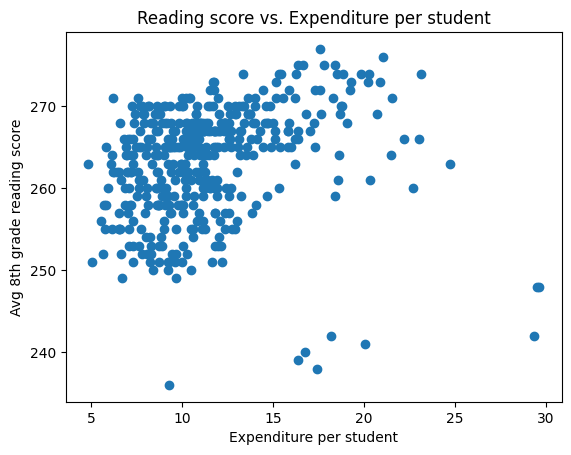

In [13]:
# @@@ 6

viz1 = df[["AVG_READING_8_SCORE", "expenditure_per_student"]].dropna()

plt.scatter(viz1["expenditure_per_student"], viz1["AVG_READING_8_SCORE"])
plt.xlabel("Expenditure per student")
plt.ylabel("Avg 8th grade reading score")
plt.title("Reading score vs. Expenditure per student")
plt.show()

**There’s a weak positive relationship shown as expenditure per student increases and the average 8th grade reading score tends to increase slightly. Most points are gathered around about $6–13k per student with reading scores roughly 250–270, so spending varies but scores stay in a relatively tight band. There are a few outliers especially at very high spending (around $20–30k) where scores are sometimes high but also include a couple of unexpectedly low reading scores, suggesting spending alone doesn’t fully explain performance.**

**Visualization 2**

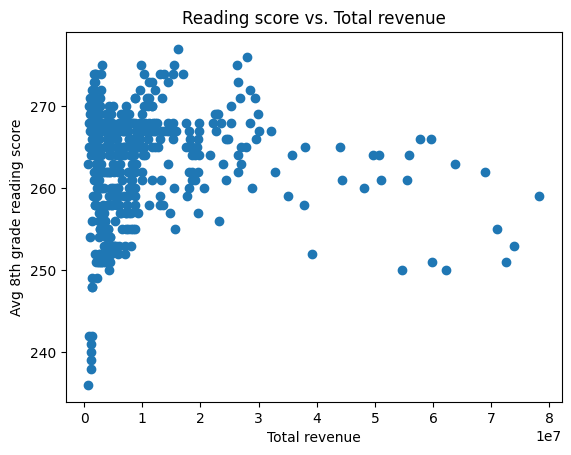

In [14]:
# @@@ 7
viz2 = df[["AVG_READING_8_SCORE", "TOTAL_REVENUE"]].dropna()

plt.scatter(viz2["TOTAL_REVENUE"], viz2["AVG_READING_8_SCORE"])
plt.xlabel("Total revenue")
plt.ylabel("Avg 8th grade reading score")
plt.title("Reading score vs. Total revenue")
plt.show()

**There’s no strong relationship between total revenue and average 8th grade reading score. The points are widely scattered, and higher revenue doesn’t consistently mean higher scores. Most states or years are clustered at low total revenue, but their reading scores still range from about 250 to 270, suggesting revenue totals alone don’t explain performance well. A few high-revenue outliers (far right) have reading scores that are mostly similar to the rest, which makes sense because total revenue is heavily influenced by state size or population, not necessarily funding quality per student.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
# @@@ 8

X = df[["expenditure_per_student", "TOTAL_REVENUE"]]
y = df["AVG_READING_8_SCORE"]
data = pd.concat([X, y], axis=1).dropna()
X = data[["expenditure_per_student", "TOTAL_REVENUE"]]
y = data["AVG_READING_8_SCORE"]

In [20]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [25]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [27]:
# @@@ 11
# create your model here
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [29]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [30]:
# @@@ 12
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
print("R^2:", r2_score(y_test, y_pred))


MAE: 4.842182405908159
MSE: 44.18357800413582
RMSE: 6.6470728899370295
R^2: -0.09966198742729415


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

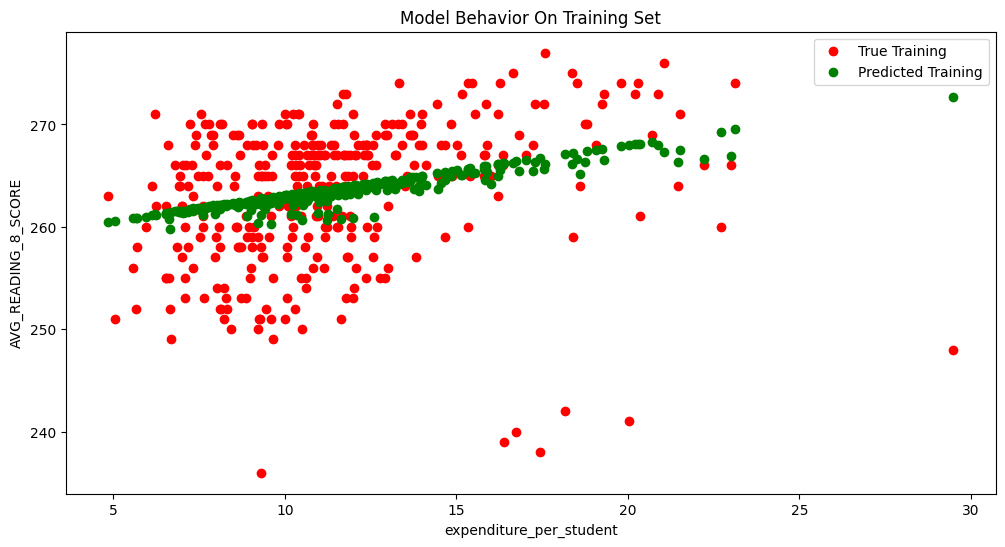

In [32]:
# @@@ 13

col_name = 'expenditure_per_student'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

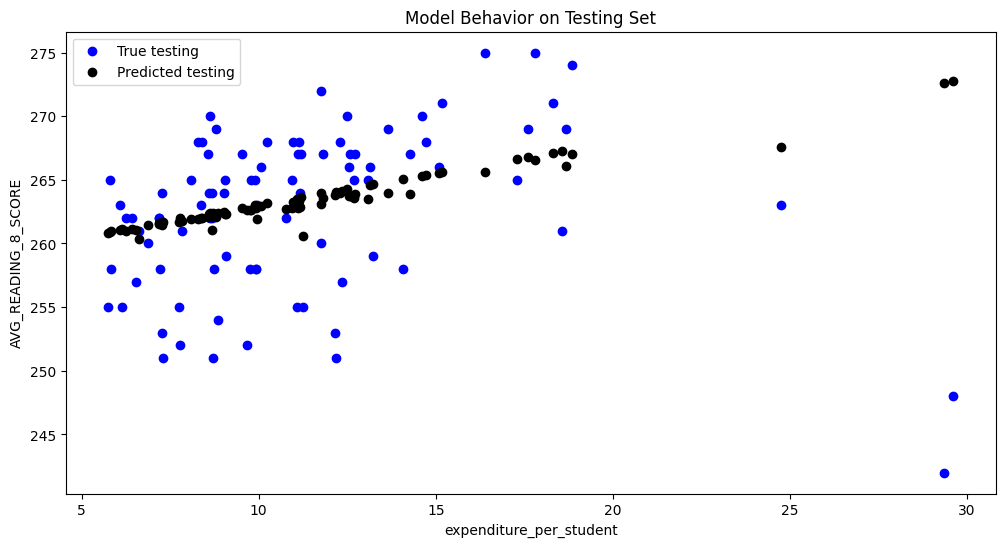

In [34]:
# @@@ 14


col_name = "expenditure_per_student"


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior on Testing Set")